## Baseline code

- target: count컬럼

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("/kaggle/input/bike-sharing-demand/train.csv")
test = pd.read_csv("/kaggle/input/bike-sharing-demand/test.csv")

## EDA

In [3]:
# 데이터 크기
train.shape, test.shape

((10886, 12), (6493, 9))

In [4]:
# 데이터 샘플
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [5]:
# 데이터 샘플
test.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000


- casual, registered의 합이 count인 것을 확인할 수 있음 (test에는 없으므로 제거)

In [6]:
# 결측값 확인
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [7]:
# 결측값 확인
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

<AxesSubplot:>

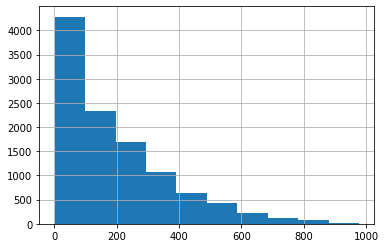

In [10]:
train['count'].hist()

## 전처리

In [12]:
# datetime
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day

test['datetime'] = pd.to_datetime(test['datetime'])
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day

# datetime 컬럼 삭제
train = train.drop('datetime', axis=1)
test = test.drop('datetime', axis=1)

In [14]:
# test에는 없는 컬럼 삭제
drop = ['casual', 'registered']
train = train.drop(drop, axis=1)
train.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1


In [17]:
# target 별도 저장
target = train.pop('count')
# pop 메서드는 원래 dataframe에서 count를 제거하고 반환, count 컬럼은 target 객체에 저장

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train, target, test_size = 0.2, random_state=2023)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((8708, 11), (2178, 11), (8708,), (2178,))

## 선형회귀 모델

In [22]:
# 평가
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_val)
r2_score(y_val, pred)

0.30780476926281297

## 랜덤포레스트

In [23]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
pred = rf.predict(X_val)
r2_score(y_val, pred)

0.44414156462309107

## XGBoost 모델

In [24]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train, y_train)
pred = xgb.predict(X_val)
r2_score(y_val, pred)

0.40839958233431084

In [25]:
# 하이퍼파라미터 
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=500, learning_rate=0.01, max_depth=9)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_val)
r2_score(y_val, pred)

0.4473182182516243

## test 데이터 예측

In [26]:
# 예측
pred = xgb.predict(test)
pred

array([ 86.14312,  67.58316,  67.58316, ..., 146.57967, 109.61407,
       178.52168], dtype=float32)

In [27]:
# csv 파일 생성
test = pd.read_csv("/kaggle/input/bike-sharing-demand/test.csv")
submit = pd.DataFrame({'datetime' : test['datetime'],
                      'count': pred})
# submit.to_csv('submission.csv', index=False)

In [28]:
# 점검
# print(pd.read_csv("submission.csv"))
print(submit.shape, test.shape)

(6493, 2) (6493, 9)
